# 1. Import Libraries

In [32]:
# data management libraries
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # for color maps
import seaborn as sns

from matplotlib import style

import pingouin as pg
from scipy import stats
from math import ceil
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

#always :)
style.use("dark_background") 

# 2. Read Data 

This dataset contains laptop prices and their specifications. Here's a description of each feature:

- **Price** (Quantitative): The price of the laptop in dollars (target variable) (we convert them to dollars from rupees in original dataset)
- **ram_gb** (Quantitative): RAM size in GB
- **ssd** (Quantitative): SSD storage capacity in GB
- **hdd** (Quantitative): HDD storage capacity in GB
- **graphic_card_gb** (Quantitative): Graphics card memory in GB
- **rating** (Ordinal): Customer rating from 1-5 stars
- **warranty** (Quantitative): Warranty period in years (0 for no warranty)
- **os_bit** (Ordinal): Operating system architecture (32 or 64 bit)
- **Touchscreen** (Binary): Whether laptop has touchscreen (Yes/No)
- **msoffice** (Binary): Whether Microsoft Office is included (Yes/No)
- **Number of Ratings** (Quantitative): Total number of customer ratings

In [33]:
df = pd.read_csv('data/laptopPrice.csv')
df.Price = df.Price.astype(float)/100
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,346.49,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,389.99,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,399.99,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,699.90,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,269.90,3 stars,0,0


In [34]:
# check for missing values
df.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [35]:
df.dtypes

brand                 object
processor_brand       object
processor_name        object
processor_gnrtn       object
ram_gb                object
ram_type              object
ssd                   object
hdd                   object
os                    object
os_bit                object
graphic_card_gb       object
weight                object
warranty              object
Touchscreen           object
msoffice              object
Price                float64
rating                object
Number of Ratings      int64
Number of Reviews      int64
dtype: object

In [36]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,767.451774,315.301337,37.609964
std,451.017905,1047.382654,121.728017
min,169.900000,0.000000,0.000000
25%,460.950000,0.000000,0.000000
50%,649.900000,17.000000,2.000000
75%,896.360000,139.500000,18.000000
max,4419.900000,15279.000000,1947.000000


# 3. EDA

In [37]:
#show the data types of each column
df.dtypes

brand                 object
processor_brand       object
processor_name        object
processor_gnrtn       object
ram_gb                object
ram_type              object
ssd                   object
hdd                   object
os                    object
os_bit                object
graphic_card_gb       object
weight                object
warranty              object
Touchscreen           object
msoffice              object
Price                float64
rating                object
Number of Ratings      int64
Number of Reviews      int64
dtype: object

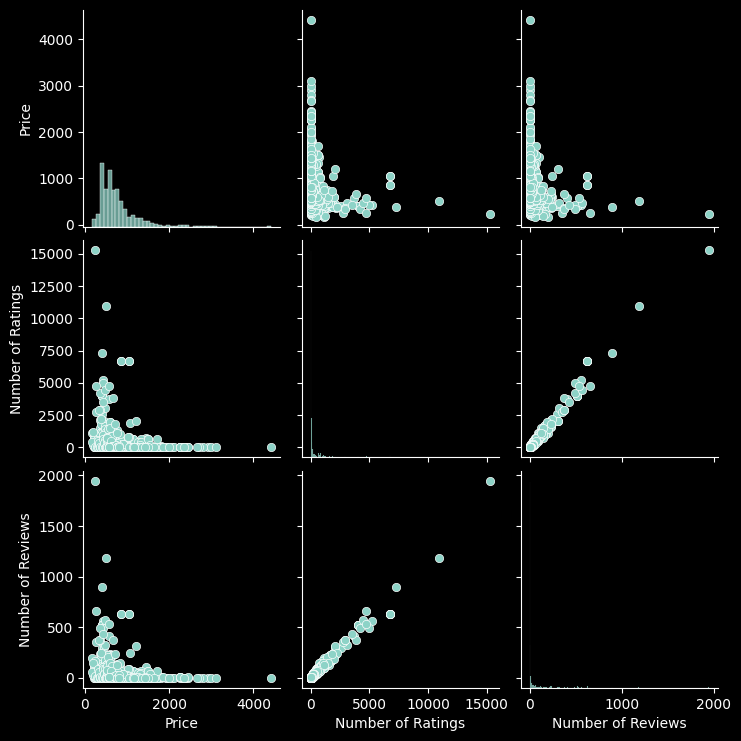

In [38]:
sns.pairplot(df)
plt.show()

We notice a really high correlation of `number of reviews` and `number of ratings`, which is logical.

## 3.1. Preprocessing

In [39]:
# Drop the number of reviews, since is it is almost 1-1 related to the number of ratings
df = df.drop(columns=['Number of Reviews'])

In [40]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, " unique values: ",df[col].unique())

brand  unique values:  ['ASUS' 'Lenovo' 'acer' 'Avita' 'HP' 'DELL' 'MSI' 'APPLE']
processor_brand  unique values:  ['Intel' 'AMD' 'M1']
processor_name  unique values:  ['Core i3' 'Core i5' 'Celeron Dual' 'Ryzen 5' 'Core i7' 'Core i9' 'M1'
 'Pentium Quad' 'Ryzen 3' 'Ryzen 7' 'Ryzen 9']
processor_gnrtn  unique values:  ['10th' 'Not Available' '11th' '7th' '8th' '9th' '4th' '12th']
ram_gb  unique values:  ['4 GB' '8 GB' '16 GB' '32 GB']
ram_type  unique values:  ['DDR4' 'LPDDR4' 'LPDDR4X' 'DDR5' 'DDR3' 'LPDDR3']
ssd  unique values:  ['0 GB' '512 GB' '256 GB' '128 GB' '1024 GB' '2048 GB' '3072 GB']
hdd  unique values:  ['1024 GB' '0 GB' '512 GB' '2048 GB']
os  unique values:  ['Windows' 'DOS' 'Mac']
os_bit  unique values:  ['64-bit' '32-bit']
graphic_card_gb  unique values:  ['0 GB' '2 GB' '4 GB' '6 GB' '8 GB']
weight  unique values:  ['Casual' 'ThinNlight' 'Gaming']
warranty  unique values:  ['No warranty' '1 year' '2 years' '3 years']
Touchscreen  unique values:  ['No' 'Yes']
msoffice  u

Removing outliers

In [41]:
initial_rows = df.shape[0]

In [42]:
# select numerical columns
numerical_columns = ['Price', 'Number of Ratings']

# remove outliers 
# checks if, for each row, all column values are within 3 standard deviations from the mean
df = df[(np.abs(stats.zscore(df[numerical_columns])) < 3).all(axis=1)]

In [43]:
print("Dropped rows: ", initial_rows - df.shape[0])

Dropped rows:  38


Encode categorical **ordinal** values 

In [44]:
#convert to int
df['ram_gb'] = df['ram_gb'].str.replace('GB','').astype(int)
df['ssd'] = df['ssd'].str.replace('GB','').astype(int)
df['hdd'] = df['hdd'].str.replace('GB','').astype(int)
df['graphic_card_gb'] = df['graphic_card_gb'].str.replace('GB','').astype(int)
df['rating'] = df['rating'].str.replace('stars','').str.replace('star','').astype(int)
df['warranty'] = df['warranty'].str.replace('No warranty','0').str.replace('years','').str.replace('year','').astype(int)
df['os_bit'] = df['os_bit'].str.replace('-bit','').astype(int)
df['Touchscreen'] = df['Touchscreen'].str.replace('No','0').str.replace('Yes','1').astype(int)
df['msoffice'] = df['msoffice'].str.replace('No','0').str.replace('Yes','1').astype(int)

Encode categorical **nominal** values

In [45]:
cat_mappings = pd.DataFrame()

In [46]:
for col in df.columns:
    if df[col].dtype == 'object':
        #map the categorical values to numerical values
        #keep the mapping dictionary for future reference
        mapping_dict = {value: i for i, value in enumerate(df[col].unique())}
        cat_mappings[col+'_numeric'] = df[col].map(mapping_dict)
        cat_mappings[col] = df[col]
        #one hot encode the col
        one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = pd.concat([df, one_hot], axis=1)
        df = df.drop(columns=[col])
        #print the mapping dictionary
        print(f"Mapping for {col}: {mapping_dict}")


Mapping for brand: {'ASUS': 0, 'Lenovo': 1, 'acer': 2, 'Avita': 3, 'HP': 4, 'DELL': 5, 'MSI': 6, 'APPLE': 7}
Mapping for processor_brand: {'Intel': 0, 'AMD': 1, 'M1': 2}
Mapping for processor_name: {'Core i3': 0, 'Core i5': 1, 'Celeron Dual': 2, 'Ryzen 5': 3, 'Core i7': 4, 'Core i9': 5, 'M1': 6, 'Pentium Quad': 7, 'Ryzen 3': 8, 'Ryzen 7': 9, 'Ryzen 9': 10}
Mapping for processor_gnrtn: {'10th': 0, 'Not Available': 1, '11th': 2, '7th': 3, '8th': 4, '9th': 5, '4th': 6, '12th': 7}
Mapping for ram_type: {'DDR4': 0, 'LPDDR4': 1, 'LPDDR4X': 2, 'DDR3': 3, 'LPDDR3': 4, 'DDR5': 5}
Mapping for os: {'Windows': 0, 'DOS': 1, 'Mac': 2}
Mapping for weight: {'Casual': 0, 'ThinNlight': 1, 'Gaming': 2}


## 3.2. Plotting

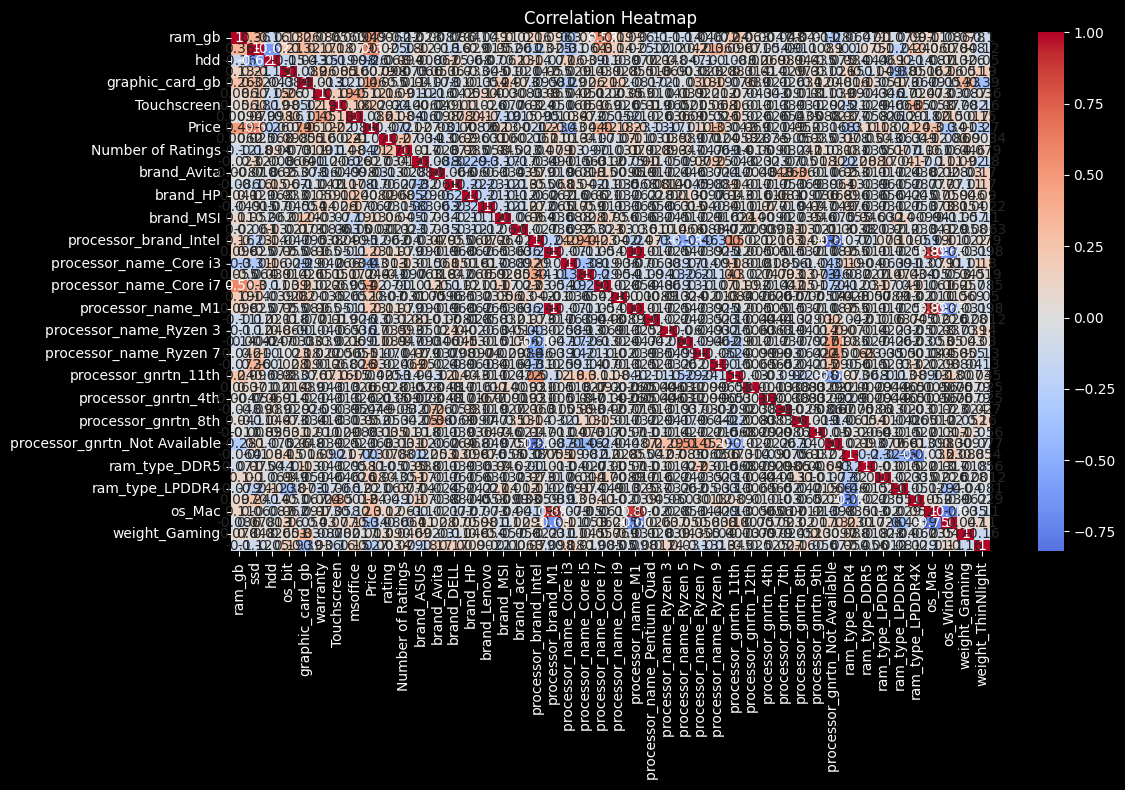

In [47]:
# Create correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [48]:
#get collumns to plot
numColsToPlot = ['ram_gb', 'ssd', 'hdd', 'os_bit', 'graphic_card_gb', 'warranty',
       'Touchscreen', 'msoffice', 'rating', 'Number of Ratings']
catColsToPlot = []
for col in cat_mappings.columns:
    if not col.endswith('_numeric'):
        catColsToPlot.append(col)

In [49]:
df_for_plot = pd.concat([df, cat_mappings], axis=1)

Numerical cols

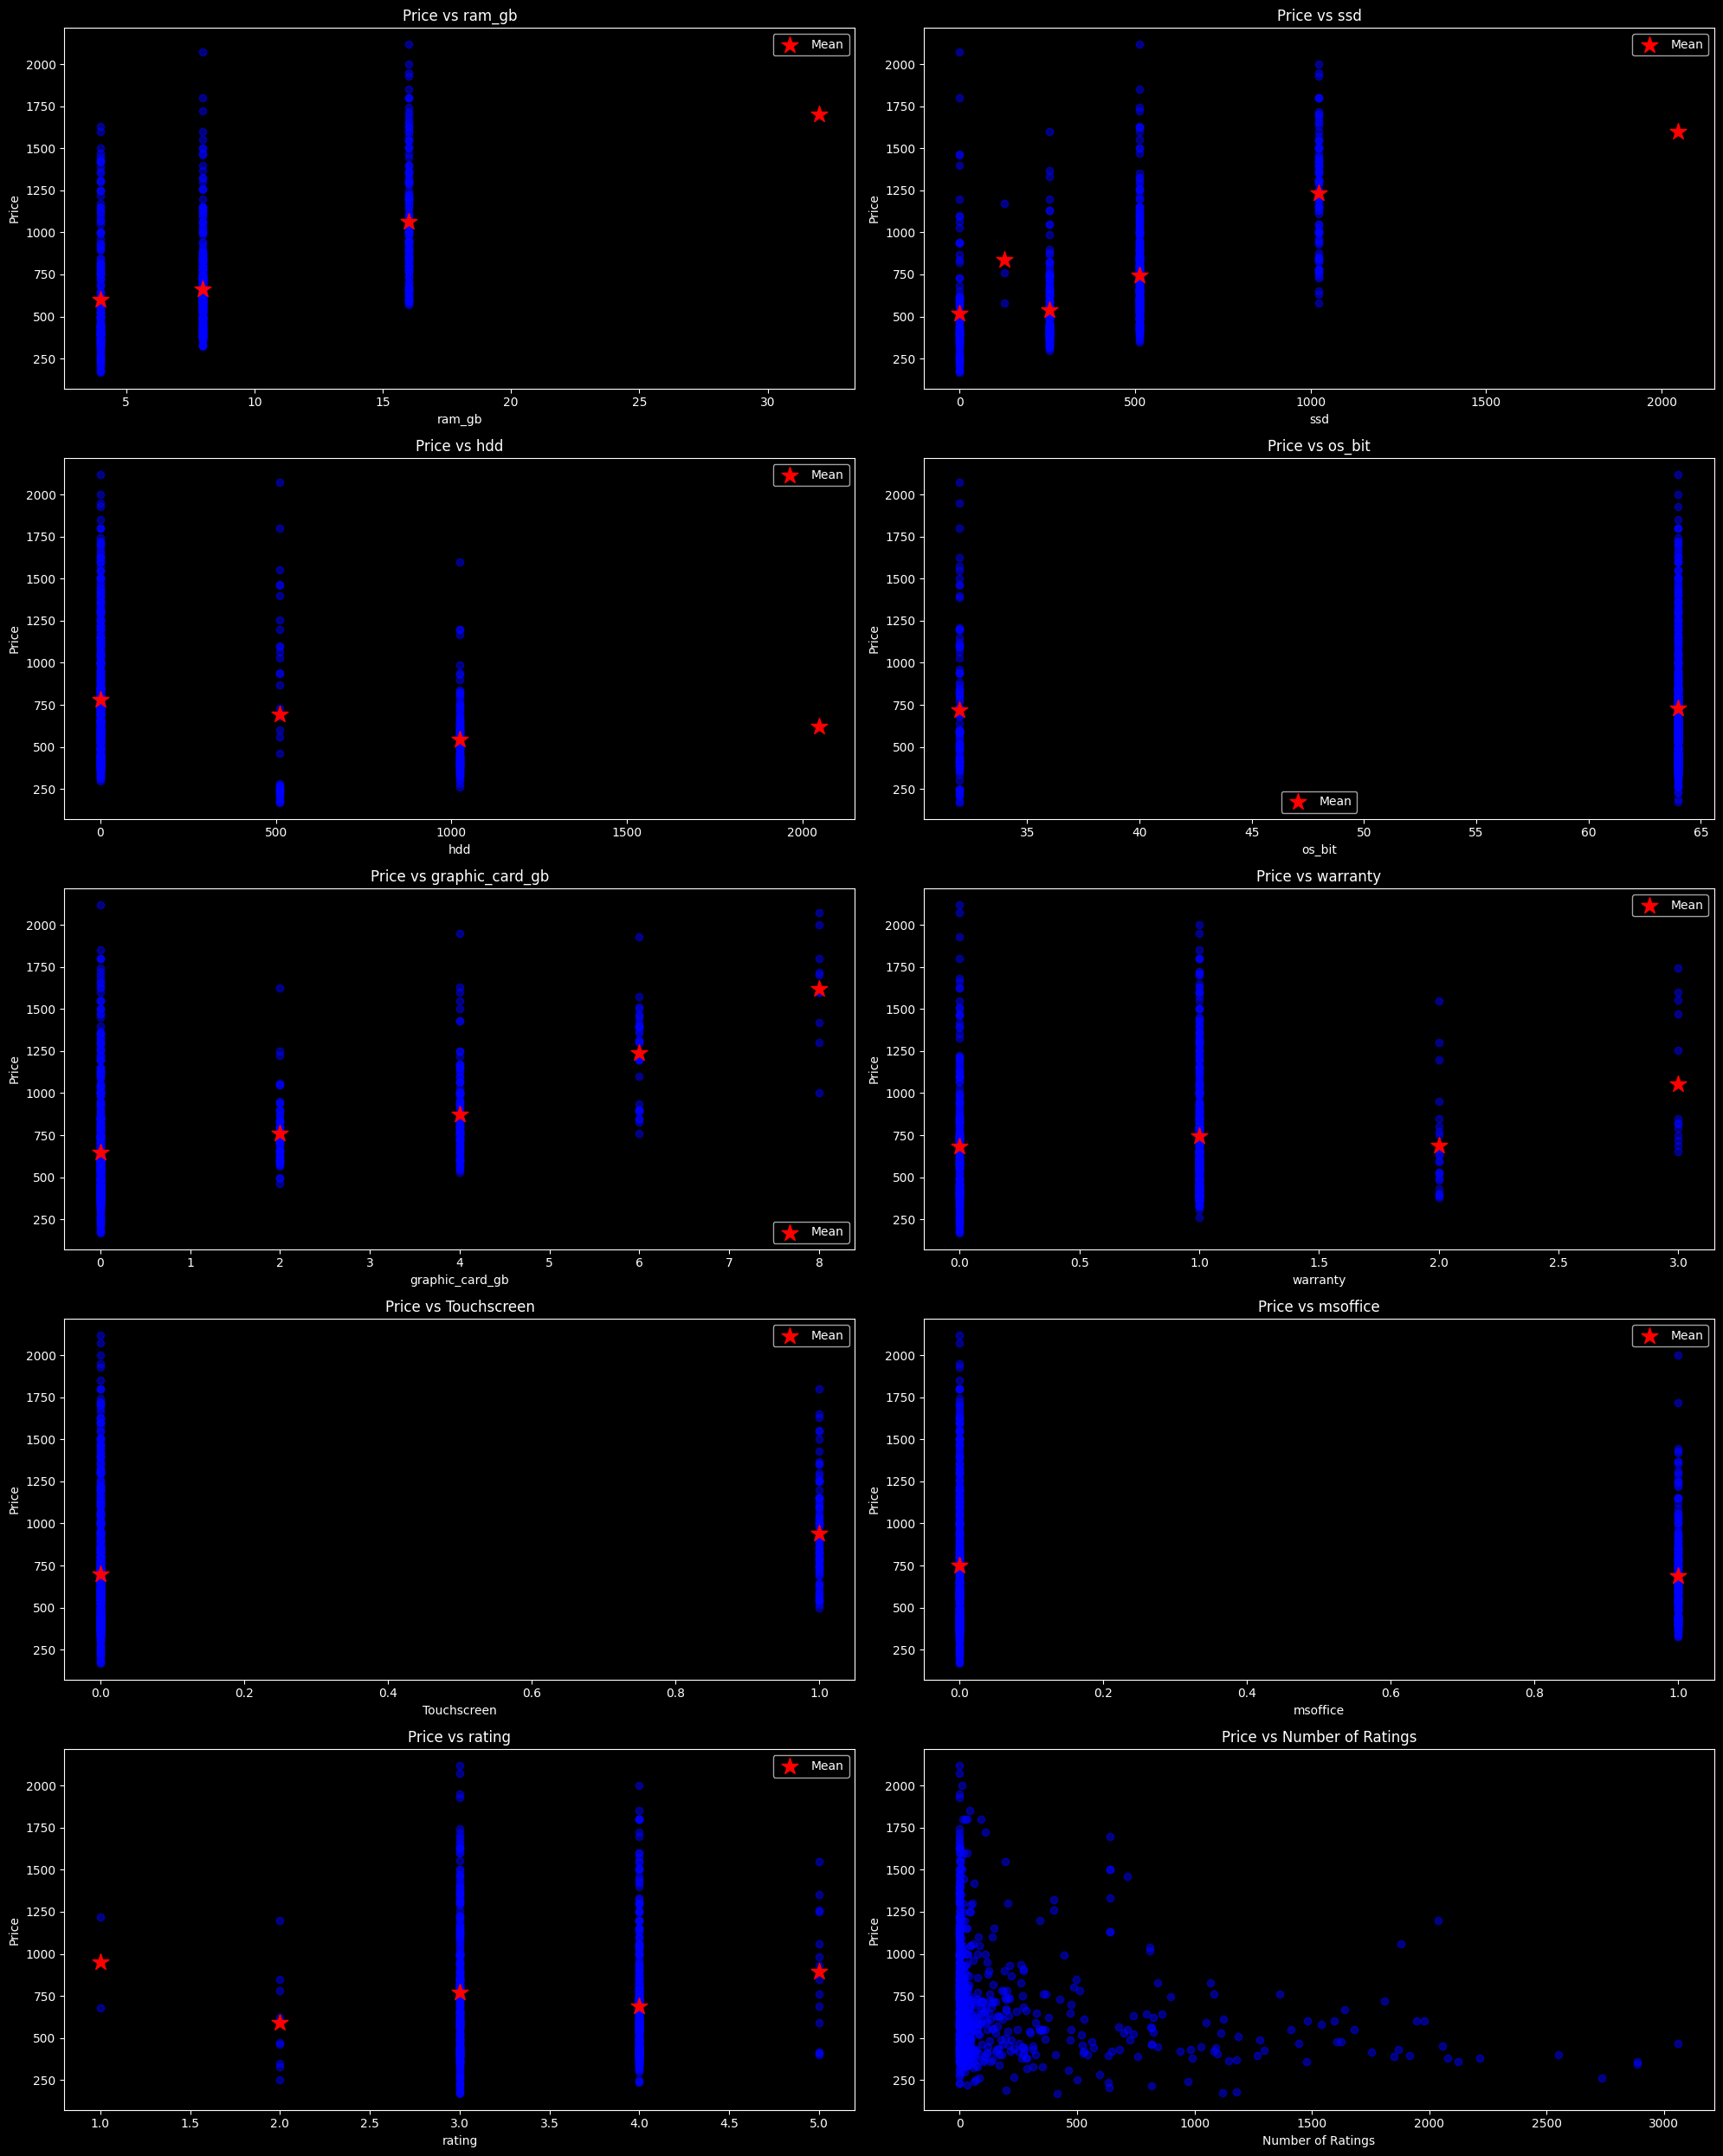

In [50]:

# Number of plots
num_plots = len(numColsToPlot)
cols = 2
rows = ceil(num_plots / cols)

# Create one figure with multiple subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 10, rows * 5))
axes = axes.flatten()  # Flatten in case of single row/column

for i, col in enumerate(numColsToPlot):
    ax = axes[i]
    ax.scatter(df[col], df['Price'], alpha=0.5, color='blue')
    ax.set_xlabel(col)
    ax.set_ylabel('Price')
    ax.set_title('Price vs ' + col)

    if df[col].nunique() < 30:
        grouped_means = df.groupby(col)['Price'].mean()
        for j, (x_val, mean_price) in enumerate(grouped_means.items()):
            ax.scatter(x_val, mean_price, color='red', marker='*', s=200, label='Mean' if j == 0 else "")
        ax.legend()

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We can see the relation between price and the numerical values.
If we look at the mean values, the clearest influence is from `graphic_card_gb` (which is reasonable)

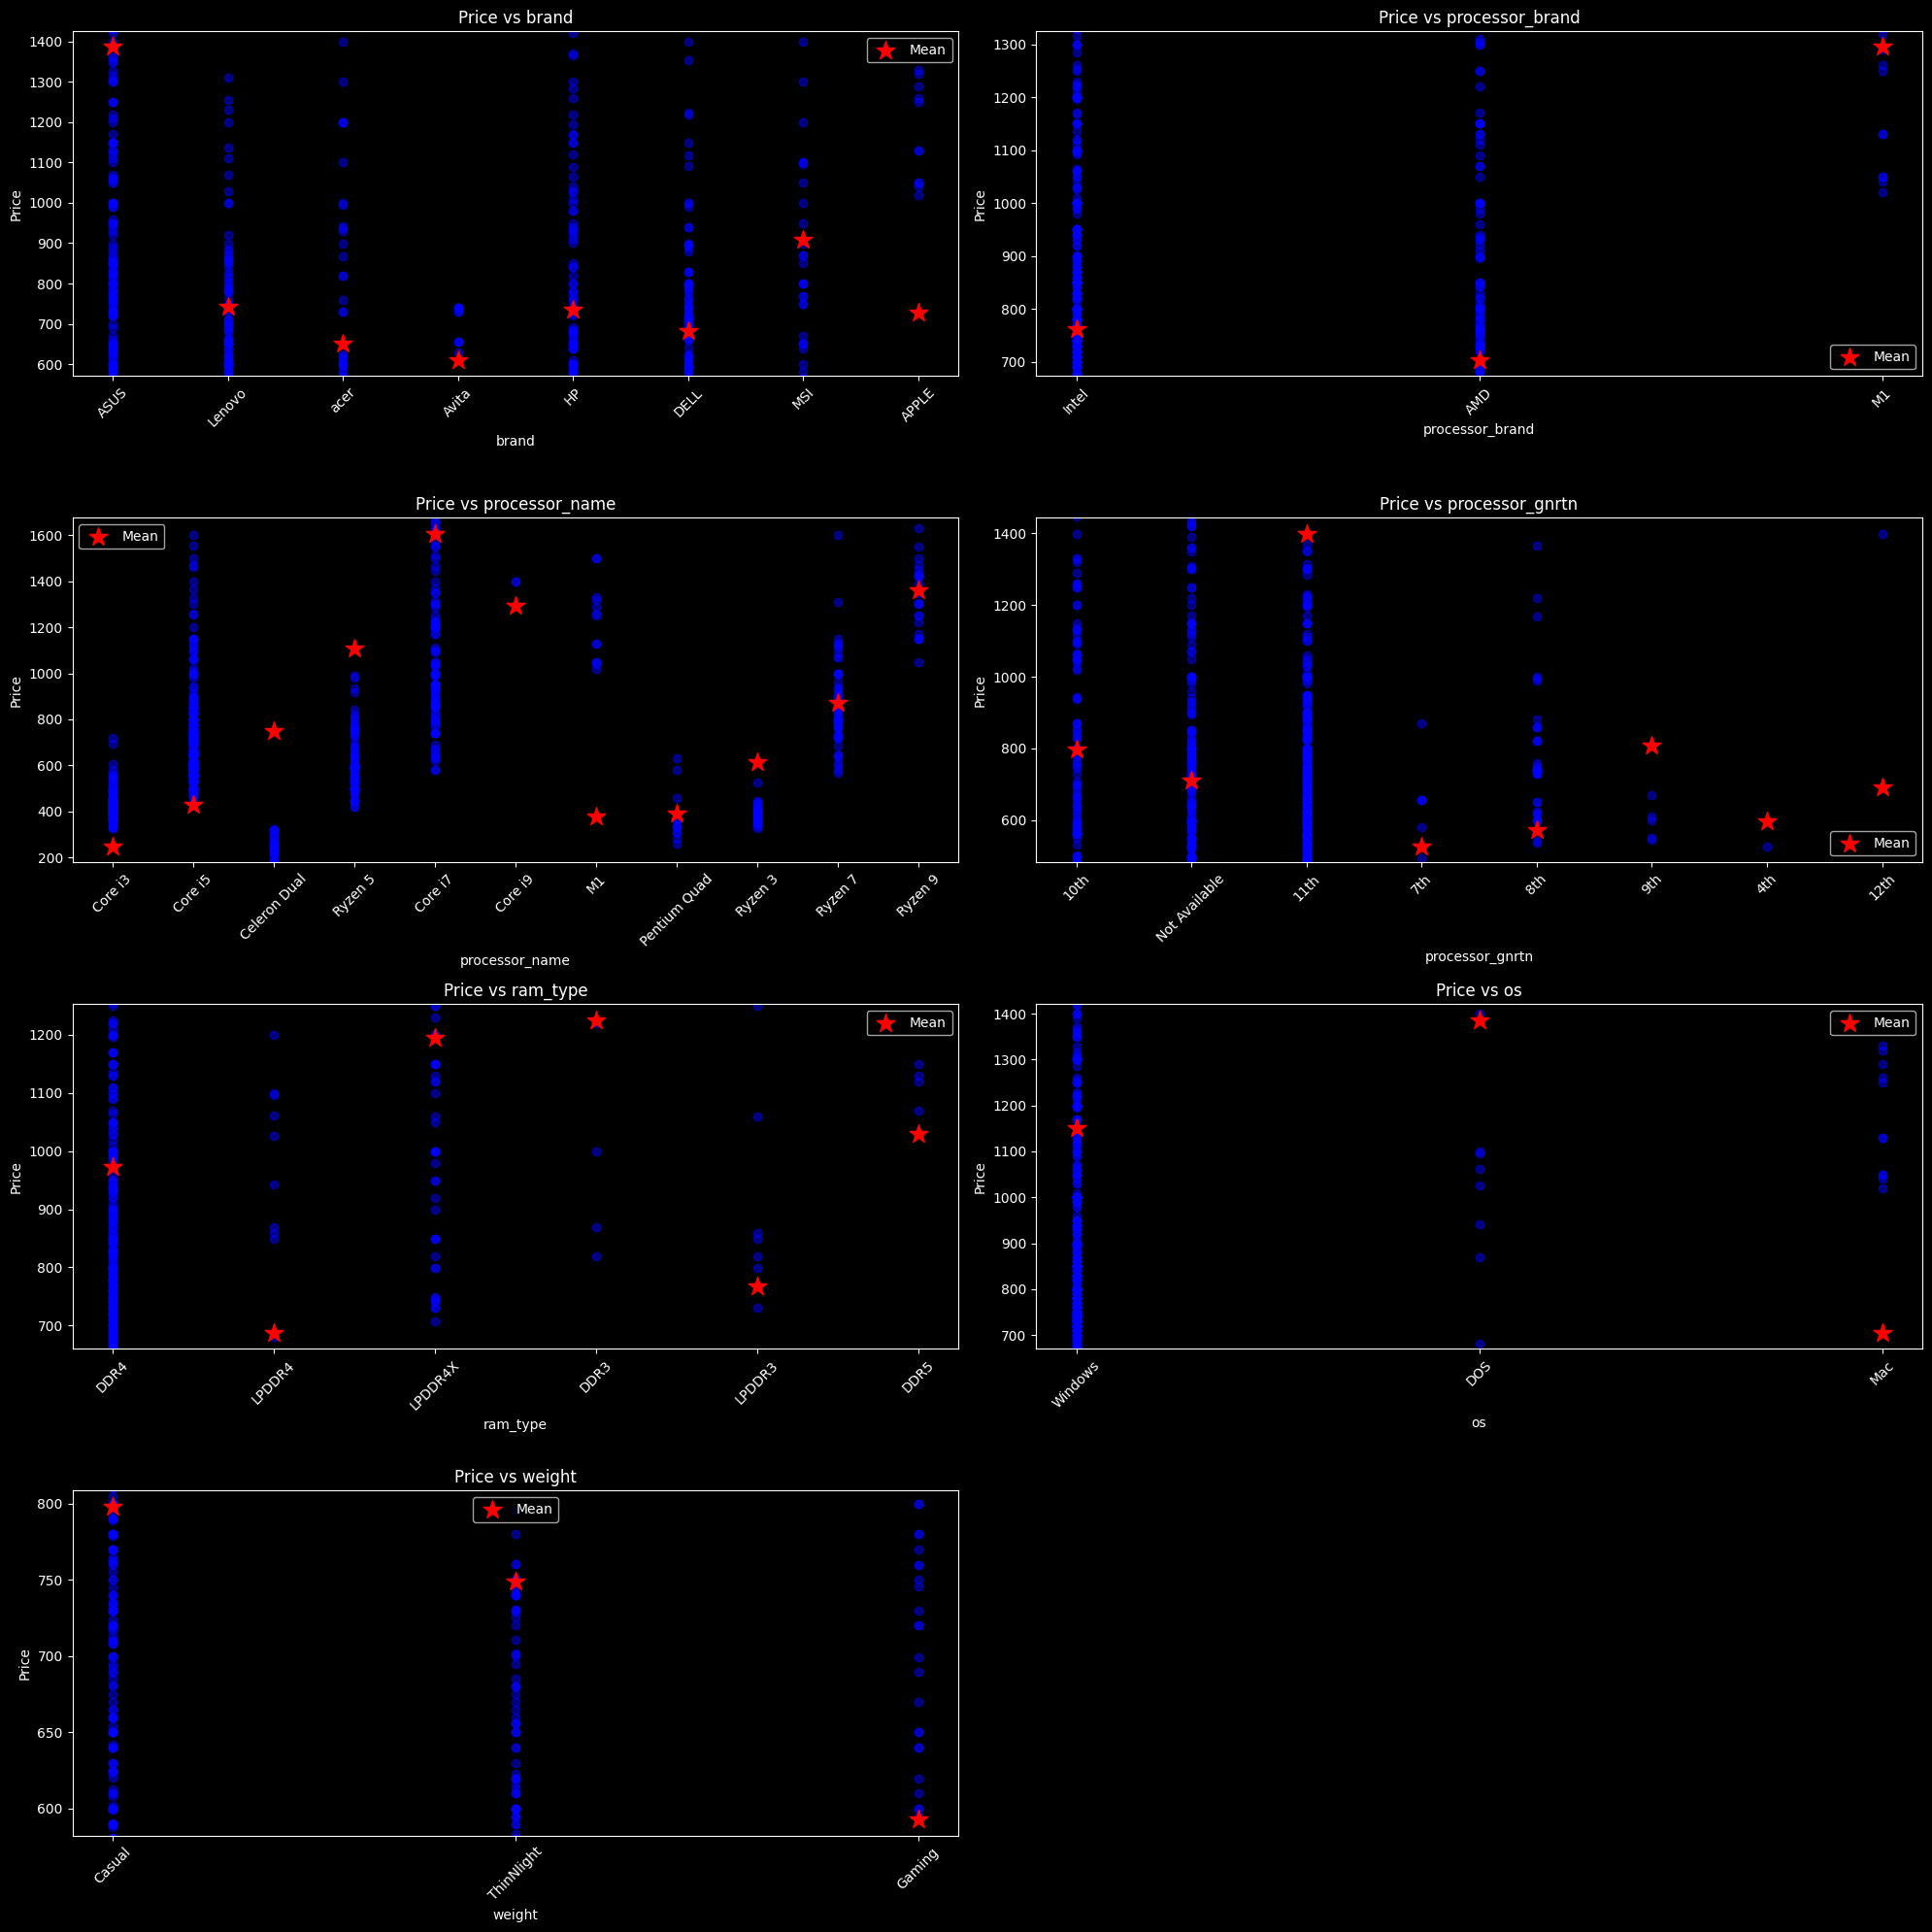

In [51]:
# Number of plots
num_plots = len(catColsToPlot)
cols = 2
rows = ceil(num_plots / cols)

# Create one figure with multiple subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 10, rows * 5))
axes = axes.flatten()  # Flatten in case of single row/column

for i, col in enumerate(catColsToPlot):
    ax = axes[i]
    ax.scatter(df_for_plot[col+'_numeric'], df_for_plot['Price'], alpha=0.5, color='blue')
    ax.set_xlabel(col)
    ax.set_ylabel('Price')
    ax.set_xticks(df_for_plot[col+'_numeric'].unique())
    ax.set_xticklabels(df_for_plot[col].unique(), rotation=45)
    ax.set_title('Price vs ' + col)

    grouped_means = df_for_plot.groupby(col)['Price'].mean()
    for x_val, mean_price in grouped_means.items():
        #add mean also with different color
        ax.scatter(x_val, mean_price, color='red', marker='*', s=200, label='Mean' if x_val == grouped_means.index[0] else "")
    ax.legend()

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Again we see the relationship between the nominal values and the prices, we can see that several categorical values, have quite different mean price per category.

# 4. Regression

## 4.1. Linear Regression

In [52]:
# Select features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
lm = pg.linear_regression(X_train_scaled, y_train, add_intercept=True)
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,7.267796e+02,5.976105,1.216143e+02,0.000000e+00,0.824669,0.811436,7.150423e+02,7.385170e+02
1,x1,2.069531e+01,8.791992,2.353882e+00,1.890942e-02,0.824669,0.811436,3.427476e+00,3.796315e+01
2,x2,7.355479e+01,11.526076,6.381599e+00,3.575693e-10,0.824669,0.811436,5.091710e+01,9.619248e+01
3,x3,2.070573e+01,8.597172,2.408435e+00,1.633036e-02,0.824669,0.811436,3.820529e+00,3.759093e+01
4,x4,-1.141933e+01,7.242421,-1.576729e+00,1.154004e-01,0.824669,0.811436,-2.564375e+01,2.805081e+00
5,x5,7.759734e+01,9.029216,8.594029e+00,7.715319e-17,0.824669,0.811436,5.986359e+01,9.533110e+01
6,x6,1.435094e+01,7.804810,1.838730e+00,6.646330e-02,0.824669,0.811436,-9.780283e-01,2.967991e+01
7,x7,6.058343e+01,7.376334,8.213217e+00,1.393149e-15,0.824669,0.811436,4.609601e+01,7.507086e+01
8,x8,-2.046631e+01,7.837645,-2.611283e+00,9.252506e-03,0.824669,0.811436,-3.585977e+01,-5.072852e+00
9,x9,-3.032832e+01,6.807339,-4.455239e+00,1.004917e-05,0.824669,0.811436,-4.369822e+01,-1.695843e+01


In [54]:
reg = LinearRegression().fit(X_train_scaled, y_train)
print(reg.score(X_test_scaled, y_test))
y_pred = reg.predict(X_test_scaled)

0.7642373698221172


In [55]:
high_pval = lm[(lm['pval'] > 0.05) & (lm['names'] != 'Intercept')]
high_pval

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
4,x4,-11.419333,7.242421,-1.576729,0.115400,0.824669,0.811436,-25.643746,2.805081
6,x6,14.350941,7.804810,1.838730,0.066463,0.824669,0.811436,-0.978028,29.679910
10,x10,-4.439837,6.887035,-0.644666,0.519397,0.824669,0.811436,-17.966258,9.086585
18,x18,-46.526731,67.256556,-0.691780,0.489351,0.824669,0.811436,-178.621391,85.567928
19,x19,15.302806,26.978617,0.567220,0.570783,0.824669,0.811436,-37.684314,68.289926
24,x25,12.669118,7.320651,1.730600,0.084052,0.824669,0.811436,-1.708944,27.047180
25,x26,4.194346,28.235494,0.148549,0.881961,0.824669,0.811436,-51.261333,59.650024
26,x27,47.566565,48.421428,0.982345,0.326337,0.824669,0.811436,-47.535123,142.668253
27,x28,67.029312,41.551578,1.613159,0.107251,0.824669,0.811436,-14.579707,148.638331
29,x30,-17.406058,9.211048,-1.889694,0.059295,0.824669,0.811436,-35.496937,0.684820


We see that a lot of features are not important. We use a backwards search, removing features that are not important

In [56]:

# Initialize with all features
remaining_features = X.columns.tolist()
final_model_features = remaining_features.copy()

# Keep track of R²s for each step
r2_scores = []

while True:
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X[remaining_features], y, test_size=0.2, random_state=42)

    # Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # DataFrame for pingouin
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

    # Run linear regression with p-values
    lm = pg.linear_regression(X_train_scaled_df, y_train, add_intercept=True)

    # Check if all features are significant
    lm_no_intercept = lm[lm['names'] != 'Intercept']
    if all(lm_no_intercept['pval'] <= 0.05):
        print("All remaining features are significant. Stopping.")
        final_model_features = remaining_features.copy()
        break

    # Drop feature with highest p-value
    feature_to_drop = lm_no_intercept.loc[lm_no_intercept['pval'].idxmax()]
    print(f"Dropping '{feature_to_drop['names']}' (p = {feature_to_drop['pval']:.4f})")

    remaining_features.remove(feature_to_drop['names'])

    # Evaluate and record R² score
    model = LinearRegression().fit(X_train_scaled, y_train)
    r2 = model.score(X_test_scaled, y_test)
    r2_scores.append({
        'r2': r2,
        'features': remaining_features.copy()
    })

# After loop ends — train final model
X_train, X_test, y_train, y_test = train_test_split(X[final_model_features], y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
final_model = LinearRegression().fit(X_train_scaled, y_train)
final_r2 = final_model.score(X_test_scaled, y_test)
y_pred_final = final_model.predict(X_test_scaled)

print("\nFinal model (all features p ≤ 0.05):")
print(f"Features: {final_model_features}")
print(f"R² on test set: {final_r2:.4f}")
# Calculate additional metrics
mse = mean_squared_error(y_test, y_pred_final)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_final)

print("Ridge Regression Results:")
print(f"R² Score: {final_r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Dropping 'processor_name_Ryzen 3' (p = 0.8820)
Dropping 'processor_gnrtn_8th' (p = 0.7532)
Dropping 'processor_gnrtn_7th' (p = 0.6905)
Dropping 'weight_ThinNlight' (p = 0.6355)
Dropping 'Number of Ratings' (p = 0.5601)
Dropping 'processor_brand_M1' (p = 0.4733)
Dropping 'processor_name_M1' (p = 0.4566)
Dropping 'ram_type_LPDDR4' (p = 0.3695)
Dropping 'ram_type_LPDDR4X' (p = 0.5451)
Dropping 'processor_gnrtn_4th' (p = 0.2769)
Dropping 'processor_gnrtn_12th' (p = 0.2605)
Dropping 'os_bit' (p = 0.1089)
Dropping 'processor_name_Pentium Quad' (p = 0.1055)
Dropping 'warranty' (p = 0.0632)
Dropping 'msoffice' (p = 0.0562)
All remaining features are significant. Stopping.

Final model (all features p ≤ 0.05):
Features: ['ram_gb', 'ssd', 'hdd', 'graphic_card_gb', 'Touchscreen', 'rating', 'brand_ASUS', 'brand_Avita', 'brand_DELL', 'brand_HP', 'brand_Lenovo', 'brand_MSI', 'brand_acer', 'processor_brand_Intel', 'processor_name_Core i3', 'processor_name_Core i5', 'processor_name_Core i7', 'processo

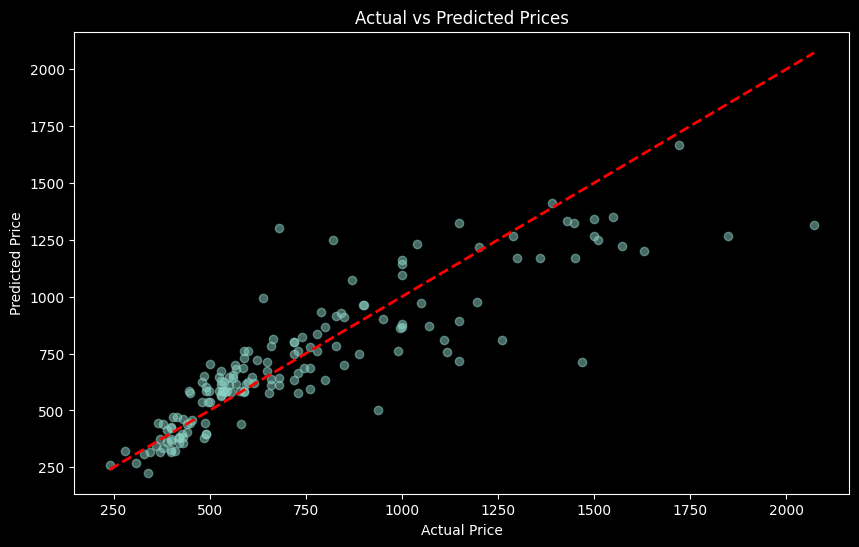

In [26]:
# Plotting the predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_final, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

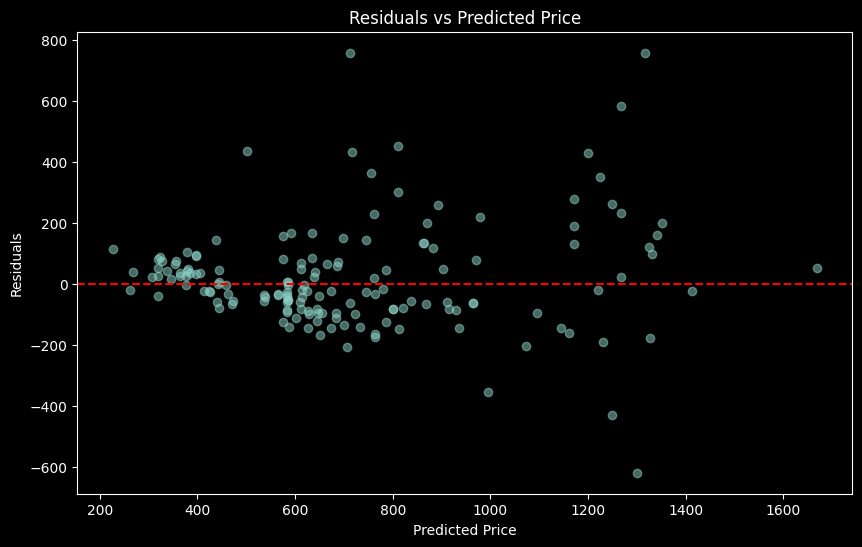

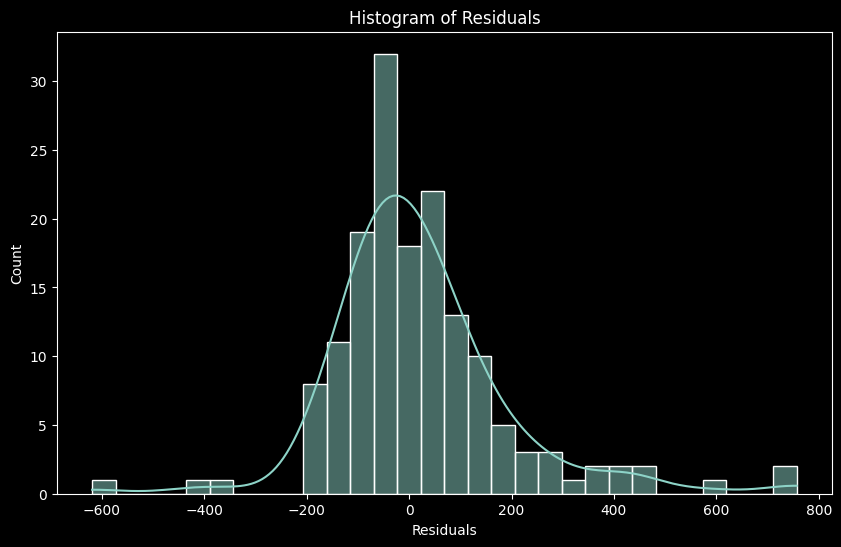

In [27]:
#plot residuals
residuals = y_test - y_pred_final
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_final, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price')
plt.show()
# plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

**Final Model**

We can see that the final R² we got in the test set is `0.7581`, which is quite high.

We can also note that the residuals are normally distributed, and centered to 0. However we can see that our model underperforms mostly in high Prices, which might suggest that the data is not lineary correlated, so we would need a more complex estimator, to achieve better results.

## 4.2. Ridge Regression Model
As a second variation, we'll implement Ridge Regression, which adds L2 regularization to help prevent overfitting.

In [57]:
# Initialize Ridge model with alpha (regularization strength)
ridge = Ridge(alpha=1.0)

# Train Ridge model
ridge.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ridge = ridge.predict(X_test_scaled)

# Calculate R² score
ridge_r2 = ridge.score(X_test_scaled, y_test)

# Calculate additional metrics
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_ridge)

print("Ridge Regression Results:")
print(f"R² Score: {ridge_r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

# Compare with original linear regression
print("\nModel Comparison:")
print(f"Linear Regression R²: {final_r2:.4f}")
print(f"Ridge Regression R²: {ridge_r2:.4f}")

Ridge Regression Results:
R² Score: 0.7609
Mean Squared Error: 30651.11
Root Mean Squared Error: 175.07
Mean Absolute Error: 117.32

Model Comparison:
Linear Regression R²: 0.7581
Ridge Regression R²: 0.7609


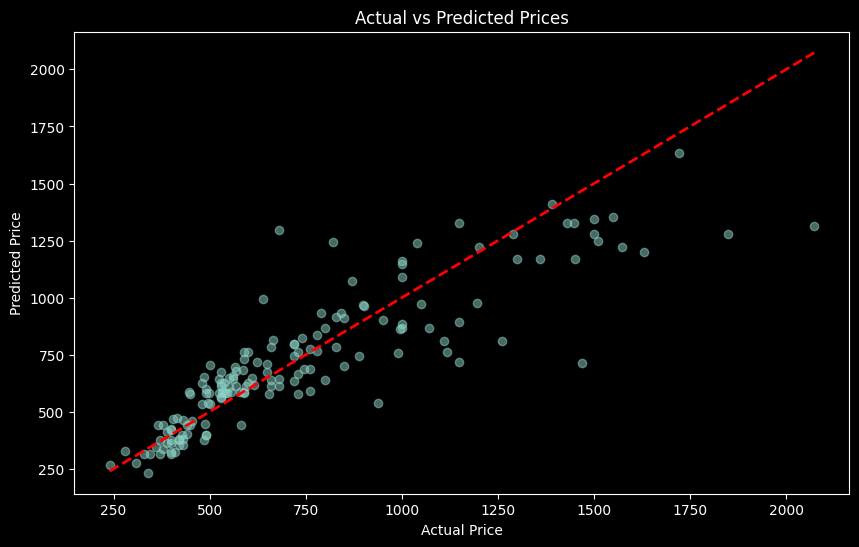

In [58]:
# Plotting the predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

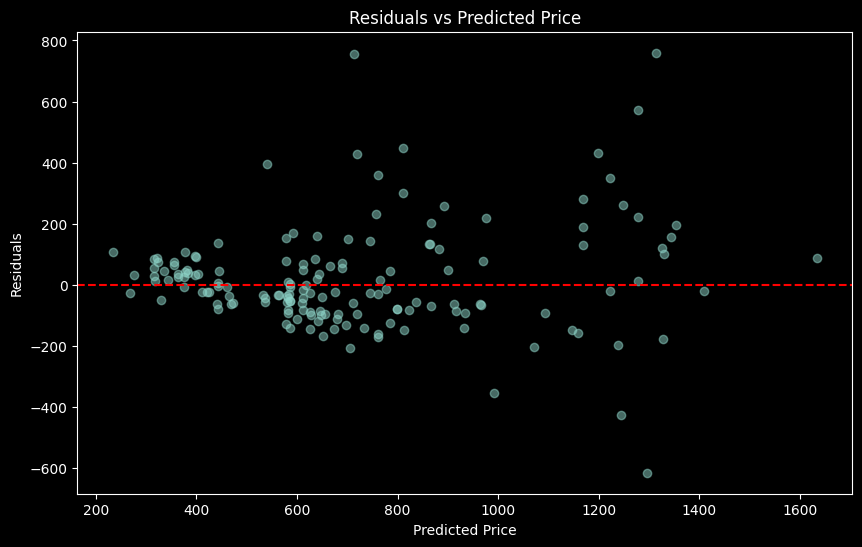

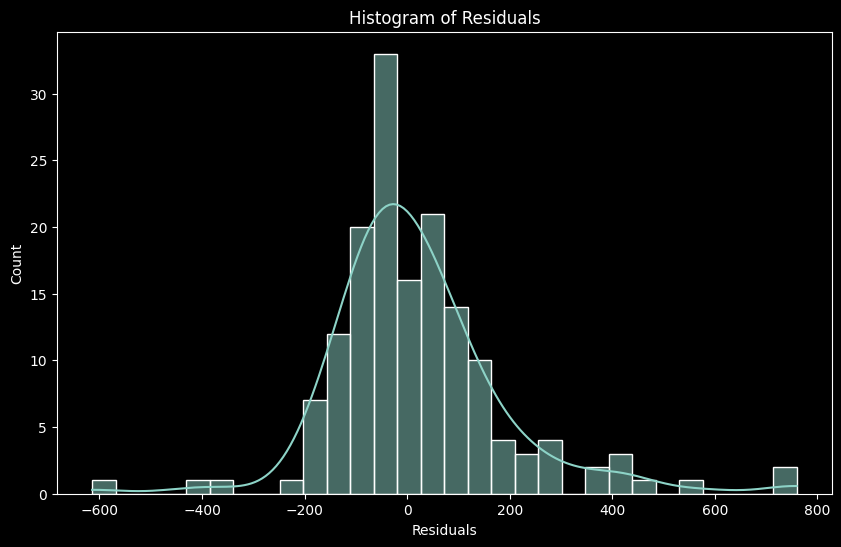

In [59]:
#plot residuals
residuals = y_test - y_pred_ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_ridge, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price')
plt.show()
# plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

We can see that both models achieve similar scores

## 4.3 Compare Feature Importance Between Models
Let's compare how the two models weight different features

<Figure size 1200x800 with 0 Axes>

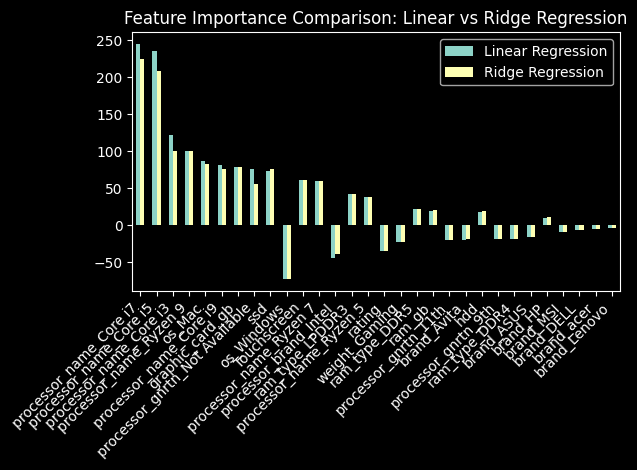

In [29]:
# Get feature coefficients for both models
linear_coef = pd.Series(final_model.coef_, index=final_model_features)
ridge_coef = pd.Series(ridge.coef_, index=final_model_features)

# Create comparison DataFrame
coef_comparison = pd.DataFrame({
    'Linear Regression': linear_coef,
    'Ridge Regression': ridge_coef
})

# Sort by absolute value of Linear Regression coefficients
coef_comparison = coef_comparison.reindex(coef_comparison['Linear Regression'].abs().sort_values(ascending=False).index)

# Plot comparison
plt.figure(figsize=(12, 8))
coef_comparison.plot(kind='bar')
plt.title('Feature Importance Comparison: Linear vs Ridge Regression')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4.4 Predictions for a New Hypothetical Laptop

Let's create a hypothetical high-end laptop configuration and predict its price using both models:
- 32GB RAM
- 1TB (1000GB) SSD
- 1TB (1000GB) HDD
- 8GB Graphics Card
- 5-star rating
- 2 years warranty
- 64-bit OS
- With Touchscreen
- With MS Office

In [30]:
# Create a hypothetical laptop configuration
hypothetical_laptop = pd.DataFrame({
    'ram_gb': [32],
    'ssd': [1000],
    'hdd': [1000],
    'graphic_card_gb': [8],
    'rating': [5],
    'warranty': [2],
    'os_bit': [64],
    'Touchscreen': [1],
    'msoffice': [1],
    'Number of Ratings': [100]  # assuming an average number of ratings
})

# Add any one-hot encoded columns that were created during preprocessing
for col in final_model_features:
    if col not in hypothetical_laptop.columns:
        hypothetical_laptop[col] = 0

# Ensure columns are in the same order as training data
hypothetical_laptop = hypothetical_laptop[final_model_features]

# Scale the features
hypothetical_scaled = scaler.transform(hypothetical_laptop)

# Make predictions with both models
linear_pred = final_model.predict(hypothetical_scaled)[0]
ridge_pred = ridge.predict(hypothetical_scaled)[0]

print("Price Predictions for Hypothetical Laptop:")
print(f"Linear Regression: ${linear_pred:,.2f}")
print(f"Ridge Regression: ${ridge_pred:,.2f}")
print(f"\nDifference between models: ${abs(linear_pred - ridge_pred):,.2f}")

Price Predictions for Hypothetical Laptop:
Linear Regression: $1,410.70
Ridge Regression: $1,461.77

Difference between models: $51.07
